# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn
# Курсовой Проект Ершова Андрея Александровича

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [22]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

pd.options.display.max_columns = 100

In [6]:
DATASET_PATH = 'c:\\Users\\andre\\source\\repos\\python\\DataScience\\project_task\\train.csv'
df = pd.read_csv(DATASET_PATH)

###### Описание датасета:

$Id$ : идентификационный номер квартиры
<br>
$DistrictId$ : идентификационный номер района
<br>
$Rooms$ : количество комнат
<br>
$Square$ : площадь
<br>
$LifeSquare$ : жилая площадь
<br>
$KitchenSquare$ : площадь кухни
<br>
$Floor$ : этаж
<br>
$HouseFloor$ : количество этажей в доме
<br>
$HouseYear$ : год постройки дома
<br>
$Ecology\_1, Ecology\_2, Ecology\_3$ : экологические показатели местности
<br>
$Social\_1, Social\_2, Social\_3$ : социальные показатели местности
<br>
$Healthcare\_1, Helthcare\_2$ : показатели местности, связанные с охраной здоровья
<br>
$Shops\_1, Shops\_2$ : показатели, связанные с наличием магазинов, торговых центров
<br>
$Price$ : цена квартиры

In [7]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


#### Предварительная корректировка модели

Признаки $LifeSquare$ и $Healthcare\_1$ имеют высокую степень разряжения. Заполняем отсутсвующие в этих столбцах значения соотвествующими медианными значениями. 

In [9]:
#df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()
#df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
lsm = df['LifeSquare'].median()
df["LifeSquare"] = df["LifeSquare"].fillna(lsm)

hcm = df['Healthcare_1'].median()
df["Healthcare_1"] = df["Healthcare_1"].fillna(hcm)

Преобразуем категориальные признаки $Ecology\_2$, $Ecology\_3$ и $Shops\_2$ в несколько бинарных

In [10]:
matching = filter(lambda column: 'Ecology_2A' in column, df.columns)

if len(list(matching)) < 1:
    df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
    df.rename(columns={"A": "Ecology_2A", "B": "Ecology_2B"}, inplace=True)
    df.drop("Ecology_2", axis=1, inplace=True)

In [11]:
matching = filter(lambda column: 'Ecology_3A' in column, df.columns)

if len(list(matching)) < 1:
    df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
    df.rename(columns={"A": "Ecology_3A", "B": "Ecology_3B"}, inplace=True)
    df.drop("Ecology_3", axis=1, inplace=True)

In [12]:
matching = filter(lambda column: 'Shops_2A' in column, df.columns)

if len(list(matching)) < 1:
    df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
    df.rename(columns={"A": "Shops_2A", "B": "Shops_2B"}, inplace=True)
    df.drop("Shops_2", axis=1, inplace=True)

Избавляемся от $мультиколлинеарности$.
<br>
;lkj;lkj;lk

In [13]:
matching = filter(lambda column: 'Shops_2B' in column, df.columns)

if len(list(matching)) == 1:
    df.drop("Ecology_2B", axis=1, inplace=True)
    df.drop("Ecology_3B", axis=1, inplace=True)
    df.drop("Shops_2B", axis=1, inplace=True)

df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2A,Ecology_3A,Shops_2A
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,900.0,0,11,184966.930730,0,0,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,0,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,0,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,0,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,0,0


In [14]:
df.Rooms = df.Rooms.astype(int)
df.HouseFloor = df.HouseFloor.astype(int)
df.Healthcare_1 = df.Healthcare_1.astype(int)

df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2A,Ecology_3A,Shops_2A
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,7976,5,900,0,11,184966.930730,0,0,0
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,10309,1,240,1,16,300009.450063,0,0,0
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,34,7759,0,229,1,3,220925.908524,0,0,0
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,23,5735,3,1084,0,5,175616.227217,0,0,0
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,5776,1,2078,2,4,150226.531644,0,0,0


#### Анализ модели 

In [15]:
target_mean = round(df.Price.mean(), 2)
target_median = df.Price.median()
target_mode = df.Price.mode()[0]

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758122)

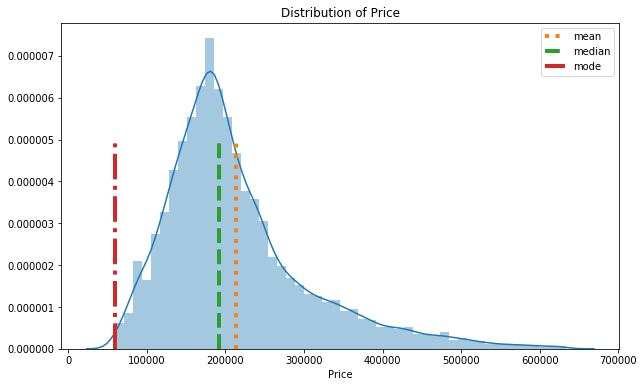

In [16]:
plt.figure(figsize = (10, 6))

sns.distplot(df.Price)

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [17]:
feature_names = df.columns.tolist()[1:]

feature_names_for_stand = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor']

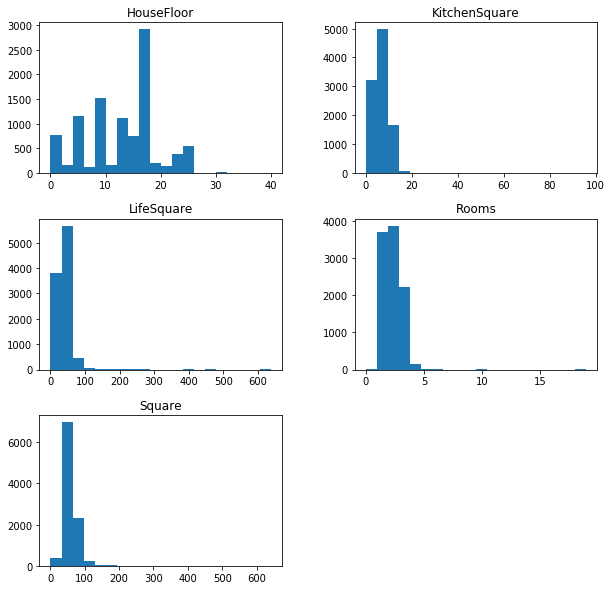

In [20]:
df_num_features = df[feature_names_for_stand]

df_num_features.hist(figsize=(10,10), bins=20, grid=False);

#### Дополнительная корректировка модели 

In [19]:
df.loc[df['LifeSquare'] > 5000, 'LifeSquare'] = df['LifeSquare'].median()
df.loc[df['KitchenSquare'] > 100, 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['HouseFloor'] > 40, 'HouseFloor'] = df['HouseFloor'].median()

#### Подготовка и обучение модели

In [23]:
X = df[feature_names_for_stand]
X = df[feature_names]
y = df[['Price']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [26]:
%%time

rfr.fit(X_train, y_train.values[:, 0])

Wall time: 1min 9s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

#### Предсказание и анализ результатов

In [27]:
y_pred = rfr.predict(X_test)

In [28]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten()
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
6252,181530.459031,181515.243319,-15.215711
4684,260456.004692,260493.383075,37.378383
1731,219945.304640,219937.846944,-7.457696
4742,66883.280318,66895.097472,11.817154
4521,114086.065201,114087.735119,1.669918


In [29]:
mean_squared_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

64161.738754434766

In [30]:
mean_absolute_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

63.5265680242725

In [31]:
r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

0.9999925408548894

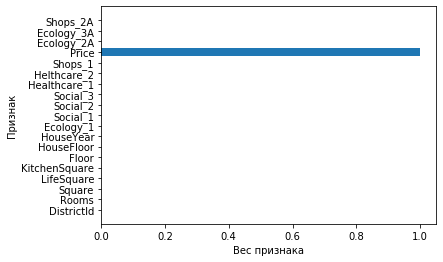

In [32]:
plt.barh(feature_names, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [33]:
df[feature_names].head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2A,Ecology_3A,Shops_2A
0,35,2,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,900,0,11,184966.930730,0,0,0
1,41,3,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240,1,16,300009.450063,0,0,0
2,53,2,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229,1,3,220925.908524,0,0,0
3,58,2,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084,0,5,175616.227217,0,0,0
4,99,1,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078,2,4,150226.531644,0,0,0
5,59,3,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990,0,6,215898.447742,0,0,0
6,154,2,62.254114,37.160377,7.0,3,5.0,1960,0.460556,20,4386,14,900,1,5,296021.204377,0,0,0
7,74,2,80.312926,32.781260,0.0,14,0.0,1977,0.075779,6,1437,3,900,0,2,221244.156664,0,0,0
8,1,2,64.511437,32.781260,1.0,9,17.0,1977,0.007122,1,264,0,900,0,1,229102.795999,0,0,0
9,23,1,46.461409,18.915552,8.0,13,17.0,2014,0.075779,6,1437,3,900,0,2,95380.220993,0,0,0


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names])
stand_features

array([[-0.35334758,  0.13043946, -0.39578028, ..., -0.09896975,
        -0.16815955, -0.29986373],
       [-0.21568684,  1.32166737,  0.44486692, ..., -0.09896975,
        -0.16815955, -0.29986373],
       [ 0.05963463,  0.13043946, -0.53984214, ..., -0.09896975,
        -0.16815955, -0.29986373],
       ...,
       [-0.53689523, -1.06078845, -0.39780109, ..., -0.09896975,
        -0.16815955,  3.33484814],
       [ 0.56439067,  0.13043946, -0.60373291, ..., -0.09896975,
         5.94673325, -0.29986373],
       [ 1.78039385, -1.06078845, -0.83813275, ..., -0.09896975,
        -0.16815955, -0.29986373]])

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [36]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

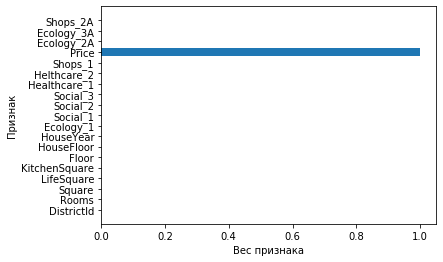

In [37]:
plt.barh(feature_names, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [38]:
y_pred = rfr.predict(X_test_scaled)

In [39]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten()
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
6252,181530.459031,182471.158843,940.699813
4684,260456.004692,261717.309595,1261.304903
1731,219945.304640,220996.177024,1050.872383
4742,66883.280318,67677.652367,794.372049
4521,114086.065201,114958.586979,872.521778


In [40]:
r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

0.9998614555011145

#### Проверка на перобучение

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = lr.predict(X_test)

In [47]:
check_test_lr = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test_lr["error"] = check_test_lr["y_pred"] - check_test_lr["y_test"]

check_test_lr.head()

,y_test,y_pred,error
6252,181530.459031,181530.459031,0.000000e+00
4684,260456.004692,260456.004692,5.820766e-11
1731,219945.304640,219945.304640,-5.820766e-11
4742,66883.280318,66883.280318,-1.455192e-11
4521,114086.065201,114086.065201,0.000000e+00


In [48]:
mean_squared_error(check_test_lr["y_test"], check_test_lr["y_pred"])

2.1294937689565145e-21

In [49]:
mean_absolute_error(check_test_lr["y_test"], check_test_lr["y_pred"])

3.0299512824664514e-11

In [50]:
r2_score(check_test_lr["y_test"], check_test_lr["y_pred"]) 

1.0

Вот, собссно, как-то так...